In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from UnarySim.sw.quantum.linear_complex import LinearComplex
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
def linear_complex_test(in_feature=16, out_feature=16):
    result_pe_r = []
    result_pe_i = []
    
    wr = torch.rand(out_feature, in_feature).mul(2).sub(1).to(device)
    wi = torch.rand(out_feature, in_feature).mul(2).sub(1).to(device)
    
    fc = LinearComplex(in_feature, out_feature, wr.t(), wi.t()).to(device)
    
    iVec_r = (torch.rand(1, in_feature).mul(2).sub(1)).to(device)
    iVec_i = (torch.rand(1, in_feature).mul(2).sub(1)).to(device)
    
    w = wr.cpu().numpy() + wi.cpu().numpy() * 1.j
    iVec = iVec_r.cpu().numpy() + iVec_i.cpu().numpy() * 1.j
    
    oVec = np.matmul(iVec, w)

    oVec_r, oVec_i = fc(iVec_r, iVec_i)

    with torch.no_grad():
        start_time = time.time()
        err_r = oVec.real - oVec_r.cpu().numpy()
        rmse_r = 1-np.sqrt(np.mean(err_r**2))/out_feature/2
        print("output r error: ", "min:", np.min(err_r), "max:", np.max(err_r))
        result_pe_r = err_r[0]/out_feature/2
        print("r error distribution=========>")
        plt.figure(figsize=(3,1.5))
        fig = plt.hist(result_pe_r, bins='auto')  # arguments are passed to np.histogram
        plt.title("r error")
        plt.show()
        
        err_i = oVec.imag - oVec_i.cpu().numpy()
        rmse_i = 1-np.sqrt(np.mean(err_i**2))/out_feature/2
        print("output i error: ", "min:", np.min(err_i), "max:", np.max(err_i))
        result_pe_i = err_i[0]/out_feature/2
        print("i error distribution=========>")
        plt.figure(figsize=(3,1.5))
        fig = plt.hist(result_pe_i, bins='auto')  # arguments are passed to np.histogram
        plt.title("i error")
        plt.show()


output r error:  min: 0.0 max: 7.450581e-09
r error distribution=========>


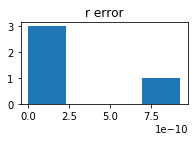

output i error:  min: -2.9802322e-08 max: 0.0
i error distribution=========>


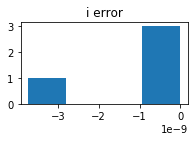

In [5]:
in_feature = 4
out_feature = in_feature
linear_complex_test(in_feature, out_feature)